In [1]:
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import collections

user_set_dem = []
user_set_rep = []

user_dem=[]
user_rep=[]
days=['1','2','3','4','5']
verification=['Non-Verified','Verified','Removed']
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID","IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI","NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "NONE"]
most_tweeted = []
most_tweeted1 = []
userlist_dem_full = []
userlist_rep_full = []
Averages = []

Non_Verified=0
Verified=0
Banned=0

In [2]:
print("Average number of tweets tweeted per user in a day (Democratic) :")
for i in range(1,6):
    data=pd.read_csv('democ'+str(i)+'.csv')
    userlist_dem=data.user.tolist()
    user_dem.append(len(userlist_dem))
    ###print(len(userlist_dem))
    user_set_dem.append(len(set(userlist_dem)))

    ###print(len(set(userlist_dem)))
    user_validity_dem=data.verified.tolist()
    Banned+=user_validity_dem.count('-1')
    Verified+=user_validity_dem.count('True')
    Non_Verified+=user_validity_dem.count('False')
    ###print(Non_Verified,' ',Verified,' ',Banned)
    
    user_states_dem=data.state.tolist()
    for j in range(0,user_states_dem.count('XXXX')):
        user_states_dem.remove('XXXX')
        
    state_freq_dem=collections.Counter(user_states_dem)
    fol=data.followers.tolist()
    
    for j in range(0,fol.count('-1')):
        fol.remove('-1')
        
    #getting accounts with most number of tweets
    orderedtweets = sorted(set(userlist_dem), key = lambda ele: userlist_dem.count(ele),reverse = True)
    most_tweeted.append(orderedtweets[0])
    most_tweeted.append(orderedtweets[1])
    userlist_dem_full.append(userlist_dem)
    
    #Getting the user ID and their Tweet frequence for democratic set
    s1 = sorted(userlist_dem, key = lambda ele: userlist_dem.count(ele),reverse = True)
    t1 = {}
    for l in s1:
      if(l in t1.keys()):
        t1[l]+=1
      else:
        t1[l]=1
    
    DemAvg = sum(t1.values())/len(t1)
    print("\n\t Day ",i," = ",round(DemAvg,2))
    Averages.append(DemAvg)
    
print("\nAverage number of tweets tweeted per user in a day (Republican) :")


for i in range(1,6):
    data=pd.read_csv('repub'+str(i)+'.csv')
    userlist_rep=data.user.tolist()
    user_rep.append(len(userlist_rep))
    ###print(len(userlist_rep))
    user_set_rep.append(len(set(userlist_rep)))
    ###print(len(set(userlist_rep)))
    
    user_validity_rep=data.verified.tolist()
    Banned+=user_validity_rep.count('-1')
    Verified+=user_validity_rep.count('True')
    Non_Verified+=user_validity_rep.count('False')
    ###print(Non_Verified,' ',Verified,' ',Banned)
    user_states_rep=data.state.tolist()
    
    for j in range(0,user_states_rep.count('XXXX')):
        user_states_rep.remove('XXXX')
        
    state_freq_rep=collections.Counter(user_states_rep)
    fol=data.followers.tolist()
    for j in range(0,fol.count('-1')):
        fol.remove('-1')
        
    #getting accounts with most number of tweets
    orderedtweets = sorted(set(userlist_rep), key = lambda ele: userlist_rep.count(ele),reverse = True)
    most_tweeted1.append(orderedtweets[0])
    most_tweeted1.append(orderedtweets[1])
    userlist_rep_full.append(userlist_rep)
    
    #Getting the user ID and their Tweet frequence for republican set
    s2 = sorted(userlist_rep, key = lambda ele: userlist_rep.count(ele),reverse = True)
    t2 = {}
    for z in s2:
      if(z in t2.keys()):
        t2[z]+=1
      else:
        t2[z]=1

    #calculating averages - 
    RepAvg = sum(t2.values())/len(t2)
    print("\n\t Day ",i," = ",round(RepAvg,2))  
    Averages.append(RepAvg)

print("\nOverall average number of tweets per day",round((sum(Averages)/len(Averages)),2))

Average number of tweets tweeted per user in a day (Democratic) :

	 Day  1  =  1.48

	 Day  2  =  1.53

	 Day  3  =  1.53

	 Day  4  =  1.64

	 Day  5  =  1.59

Average number of tweets tweeted per user in a day (Republican) :

	 Day  1  =  1.57

	 Day  2  =  1.56

	 Day  3  =  1.67

	 Day  4  =  1.75

	 Day  5  =  1.62

Overall average number of tweets per day 1.59


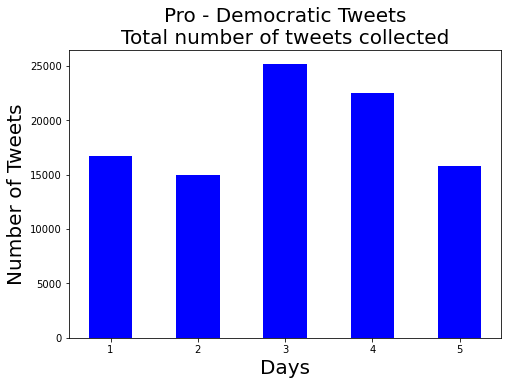

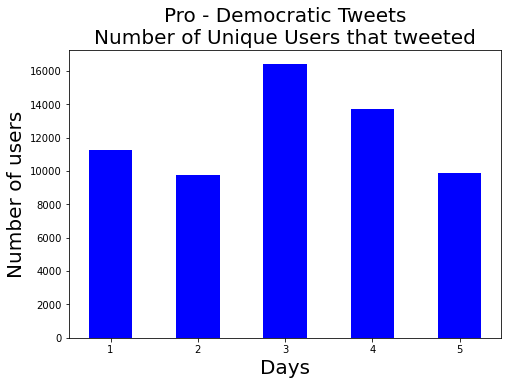

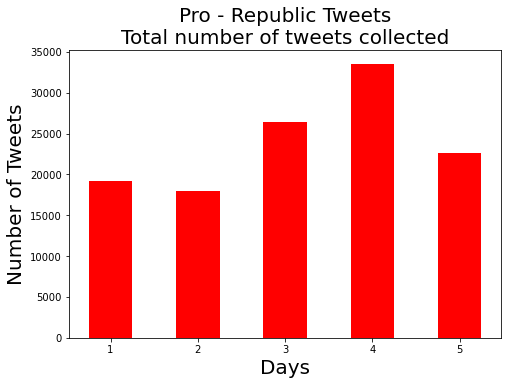

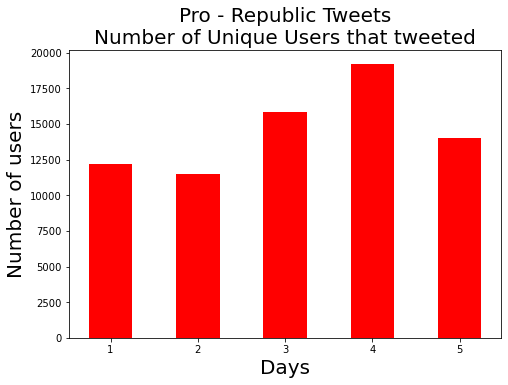

In [3]:

fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1]) ###Bar graph for days vs Total users
ax1.bar(days,user_dem,color=['blue', 'blue', 'blue', 'blue', 'blue'],width = 0.5)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Number of Tweets',fontsize=20)
plt.title('Pro - Democratic Tweets\nTotal number of tweets collected',fontsize=20)
plt.savefig('Graphs/BarGraph_Demo1.png',dpi=100, bbox_inches='tight')
plt.show()



fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])  ###Bar graph for days  vs unique users
ax2.bar(days,user_set_dem,color=['blue', 'blue', 'blue', 'blue', 'blue'],width = 0.5)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Number of users',fontsize=20)
plt.title('Pro - Democratic Tweets\nNumber of Unique Users that tweeted',fontsize=20)
plt.savefig('Graphs/BarGraph_Demo2.png',dpi=100, bbox_inches='tight')
plt.show()


fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1]) ###Bar graph for days vs Total users
ax1.bar(days,user_rep,color=['red', 'red', 'red', 'red', 'red'],width = 0.5)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Number of Tweets',fontsize=20)
plt.title('Pro - Republic Tweets\nTotal number of tweets collected',fontsize=20)
plt.savefig('Graphs/BarGraph_Rep1.png',dpi=100, bbox_inches='tight')
plt.show()


fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])  ###Bar graph for days  vs unique users
ax2.bar(days,user_set_rep,color=['red', 'red', 'red', 'red', 'red'],width = 0.5)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Number of users',fontsize=20)
plt.title('Pro - Republic Tweets\nNumber of Unique Users that tweeted',fontsize=20)
plt.savefig('Graphs/BarGraph_Rep2.png',dpi=100, bbox_inches='tight')
plt.show()



In [5]:
import pandas as pd
import matplotlib as plt
import numpy as np

unique_user_dem=set()
followers_dem=[]
for name in range(1,6):
    data=pd.read_csv("democ"+str(name)+".csv")
    for i in range(len(data)):
        user=data['user'][i]
        if user in unique_user_dem:
            continue
        else:
            unique_user_dem.add(user)
            followers_dem.append(data['followers'][i])
    

unique_user_rep=set()
followers_rep=[]
for name in range(1,6):
    data=pd.read_csv("repub"+str(name)+".csv")
    for i in range(len(data)):
        user=data['user'][i]
        if user in unique_user_rep:
            continue
        else:
            unique_user_rep.add(user)
            followers_rep.append(data['followers'][i])

In [6]:
dem_class = [0,0,0,0]
rep_class = [0,0,0,0]

for i in followers_dem:
    if(i<50):
        dem_class[0]+=1
    elif(i<200):
        dem_class[1]+=1
    elif(i<1000):
        dem_class[2]+=1
    else:
        dem_class[3]+=1
for i in followers_rep:
    if(i<50):
        rep_class[0]+=1
    elif(i<200):
        rep_class[1]+=1
    elif(i<1000):
        rep_class[2]+=1
    else:
        rep_class[3]+=1

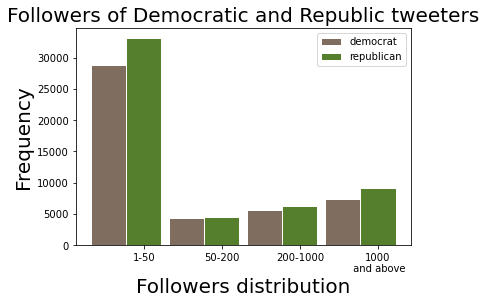

In [7]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.45
 
# set height of bar
bars1 = dem_class
bars2 = rep_class
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='democrat')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='republican')

# Add xticks on the middle of the group bars
plt.xlabel('Followers distribution',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks([r + barWidth for r in range(len(bars1))], ['1-50', '50-200', '200-1000', '1000\n and above'])
# Create legend & Show graphic
plt.rcParams["figure.figsize"] = (10, 8)
plt.legend()
plt.title('Followers of Democratic and Republic tweeters',fontsize=20)
plt.savefig('Graphs/BarGraph_Followers.png',dpi=100, bbox_inches='tight')
plt.show()

<ipython-input-8-1b08a1a94de0>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = plt.axes()


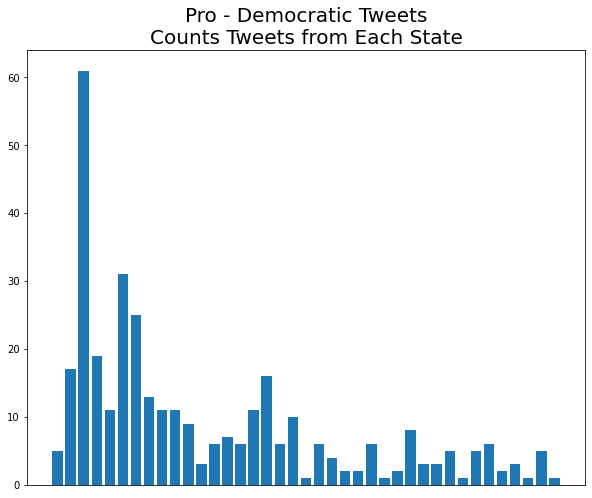

<ipython-input-8-1b08a1a94de0>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = plt.axes()


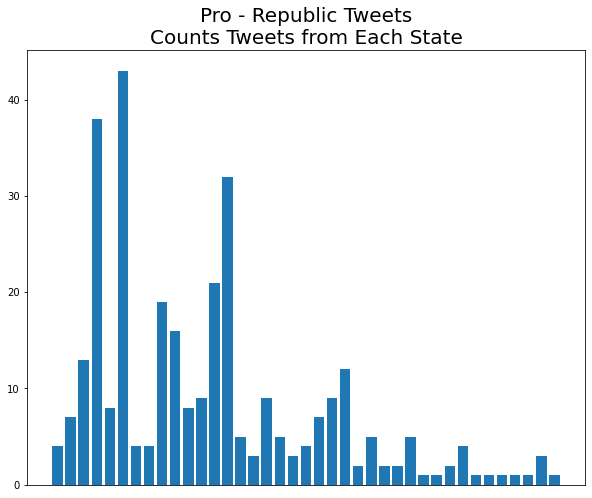

Where the X axis is: dict_keys(['GA', 'SC', 'AZ', 'CA', 'NJ', 'TX', 'AL', 'MD', 'IL', 'OH', 'VA', 'TN', 'NY', 'FL', 'MA', 'IN', 'NV', 'ME', 'LA', 'CO', 'PA', 'MI', 'NC', 'WV', 'CT', 'WI', 'KY', 'ID', 'NH', 'WA', 'OK', 'IA', 'OR', 'VT', 'DE', 'KS', 'UT', 'SD', 'DC'])


In [8]:
plt.bar(state_freq_dem.keys(), state_freq_dem.values()) ###plots bar graph of count of each states
plt.title('Pro - Democratic Tweets\nCounts Tweets from Each State',fontsize=20)
ax3 = plt.axes()
x_axis = ax3.axes.get_xaxis()
x_axis.set_visible(False)
plt.savefig('Graphs/BarGraph_DemoTweetcount.png',dpi=100, bbox_inches='tight')
plt.show()

plt.bar(state_freq_rep.keys(), state_freq_rep.values()) ###plots bar graph of count of each states
plt.title('Pro - Republic Tweets\nCounts Tweets from Each State',fontsize=20)
ax3 = plt.axes()
x_axis = ax3.axes.get_xaxis()
x_axis.set_visible(False)
plt.savefig('Graphs/BarGraph_RepTweetcount.png',dpi=100, bbox_inches='tight')
plt.show()
print("Where the X axis is:",state_freq_rep.keys())

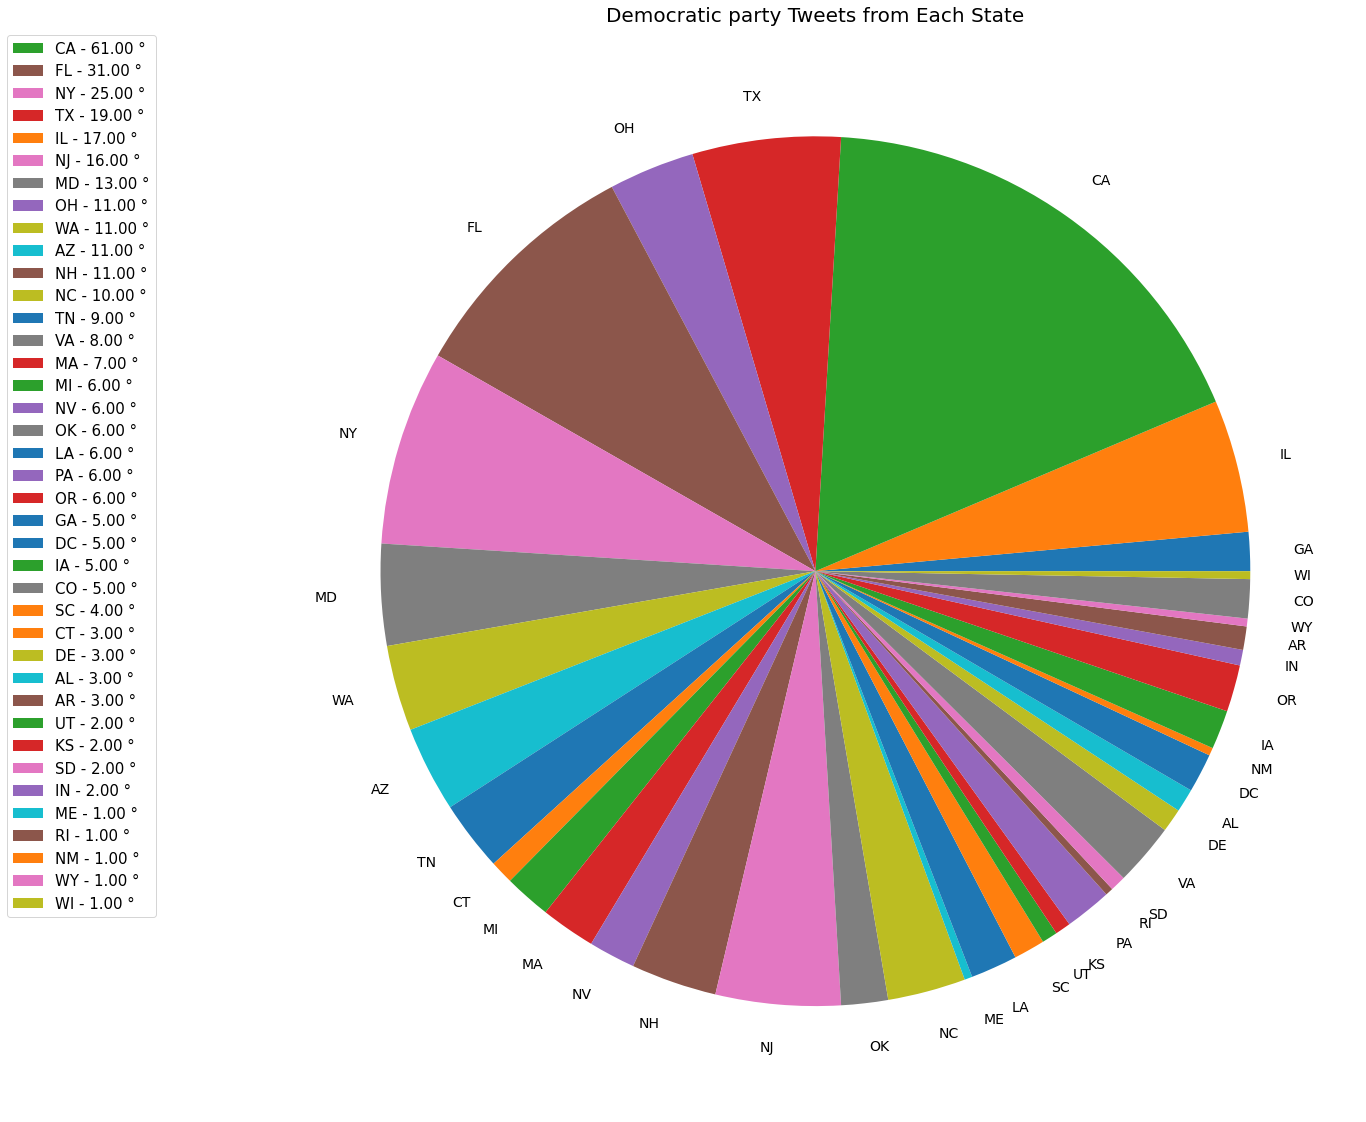

In [12]:
fig4 = plt.figure(figsize =(25, 20)) 
plt.title('Democratic party Tweets from Each State',fontsize=20)
patches,texts = plt.pie( state_freq_dem.values(),labels= state_freq_dem.keys() ,textprops={'fontsize': 14}, startangle=0) 
###Plots Pie chart of verified vs non_verified vs Banned 
labels = ['{0} - {1:1.2f} °'.format(i,j) for i,j in zip(state_freq_dem.keys(), state_freq_dem.values())]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels,state_freq_dem.values()),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)
plt.savefig('Graphs/Pie_DemoState.png',dpi=100, bbox_inches='tight')
plt.show()

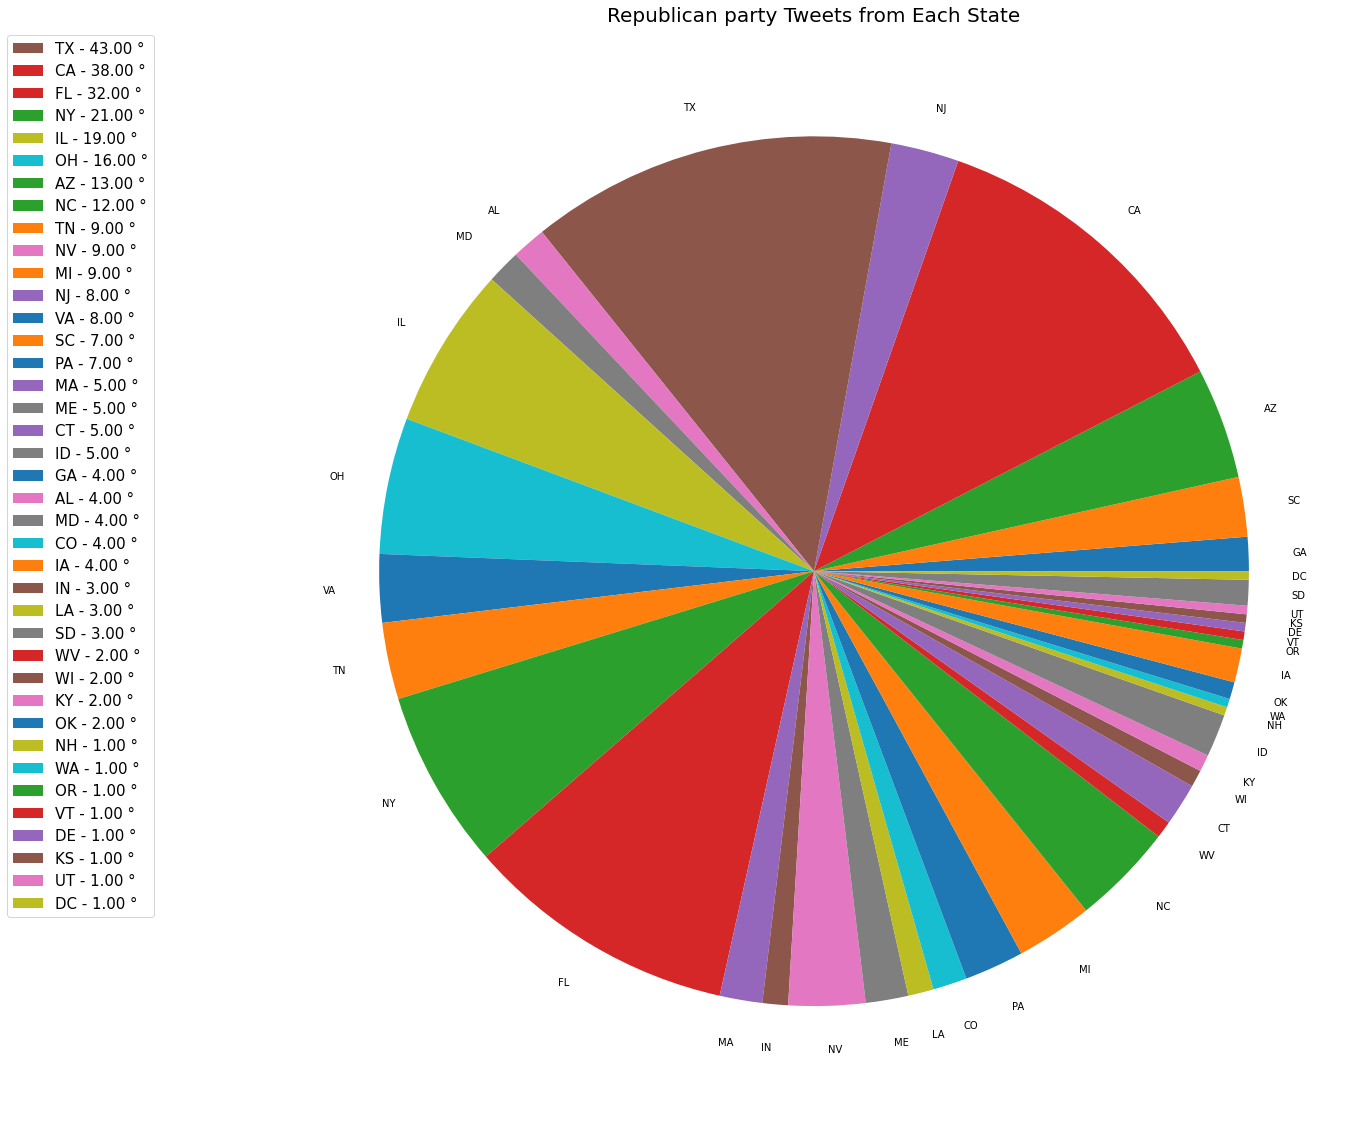

In [23]:
fig4 = plt.figure(figsize =(25, 20)) 
plt.title('Republican party Tweets from Each State',fontsize=20)
patches,texts = plt.pie( state_freq_rep.values(),labels= state_freq_rep.keys(), textprops={'fontsize': 10}, startangle=0)  ###Plots Pie chart of verified vs non_verified vs Banned 
labels = ['{0} - {1:1.2f} °'.format(i,j) for i,j in zip(state_freq_rep.keys(), state_freq_rep.values())]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels,state_freq_rep.values()),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)
plt.savefig('Graphs/Pie_RepState.png',dpi=100, bbox_inches='tight')
plt.show()

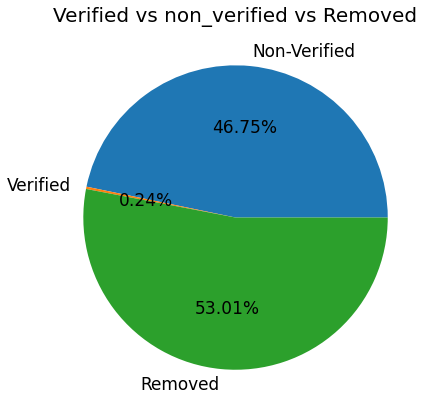

In [14]:
verification_count=[Non_Verified,Verified,Banned]
fig3 = plt.figure(figsize =(10, 7)) 
plt.title('Verified vs non_verified vs Removed',fontsize=20)
plt.pie(verification_count, labels = verification, autopct='%1.2f%%',textprops={'fontsize': 17})  ###Plots Pie chart of verified vs non_verified vs Banned 
plt.savefig('Graphs/Pie_Verified.png',dpi=100, bbox_inches='tight')
plt.show()

In [15]:
from ssl import SSLError
import botometer
import re
import time
from requests.exceptions import Timeout, ConnectionError
from urllib3.exceptions import ReadTimeoutError
import json
import tweepy
from urllib3.exceptions import ProtocolError
import sqlite3
import logging
global api
consumer_key="insert consumer key"
consumer_secret="insert consumer secret key"
access_token="insert access token"
access_token_secret="insert access token secret"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
if (api):
    print("Login Success")
else:
    print("Failed")
rapidapi_key = "insert rapid api key" # now it's called rapidapi key
twitter_app_auth = {
    'consumer_key': consumer_key,
    'consumer_secret': consumer_secret,
    'access_token': access_token,
    'access_token_secret': access_token_secret,
  }
bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)


user_name_list= list(set(most_tweeted))
user_name_list1= list(set(most_tweeted1))

print("Lets Check if the top Tweeters are Bots or not ")
print("We take the top 2 tweeters on each day for republican and democratic parties over 5 days ")
print("The results are as follows")
from beautifultable import BeautifulTable

table = BeautifulTable()
table.columns.header = ["User", "Bot"]
print("\n Top democratic tweeters:")
for i in range (0,len(user_name_list)):
    try:
        bot_result = bom.check_account(user_name_list[i])
        score=bot_result["cap"]["english"]*100
        if (score>60):
            bot_chance='Yes' 
        if (score>40 and score<60):
            bot_chance='Maybe'
        if (score<40):
            bot_chance='No'
    except:
        bot_chance='Unknown'
        
    table.rows.append([user_name_list[i],bot_chance])

table.set_style(BeautifulTable.STYLE_GRID)
print(table)

table1 = BeautifulTable()
table1.columns.header = ["User", "Bot"]
print("\n Top republican tweeters:")
for i in range (0,len(user_name_list1)):
    try:
        bot_result = bom.check_account(user_name_list1[i])
        score=bot_result["cap"]["english"]*100
        if (score>60):
            bot_chance='Yes' 
        if (score>40 and score<60):
            bot_chance='Maybe'
        if (score<40):
            bot_chance='No'
    except:
        bot_chance='Unknown'
        
    table1.rows.append([user_name_list1[i],bot_chance])

table1.set_style(BeautifulTable.STYLE_GRID)
print(table1)

Login Success
Lets Check if the top Tweeters are Bots or not 
We take the top 2 tweeters on each day for republican and democratic parties over 5 days 
The results are as follows

 Top democratic tweeters:
╔═════════════════╤═════════╗
║      User       │   Bot   ║
╟─────────────────┼─────────╢
║ BrianAnthonyBo1 │   Yes   ║
╟─────────────────┼─────────╢
║ alfysantillana  │  Maybe  ║
╟─────────────────┼─────────╢
║ BrooklynCoastal │   Yes   ║
╟─────────────────┼─────────╢
║ Luminate_Design │   Yes   ║
╟─────────────────┼─────────╢
║ CommissarRudie  │   Yes   ║
╟─────────────────┼─────────╢
║    DJBurn77     │   Yes   ║
╟─────────────────┼─────────╢
║   pinnacle07    │   Yes   ║
╟─────────────────┼─────────╢
║ FrancescaRubio1 │ Unknown ║
╟─────────────────┼─────────╢
║     MReele      │  Maybe  ║
╚═════════════════╧═════════╝

 Top republican tweeters:
╔═════════════════╤═════════╗
║      User       │   Bot   ║
╟─────────────────┼─────────╢
║ yurlifematters  │ Unknown ║
╟────────────────

In [16]:
top_hash_dem = {}
top_hash_rep = {}
hashlist_dem = []
hashlist_rep = []
usa1 = []
usa2 = []
for i in range(1,6):
    data=pd.read_csv('democ'+str(i)+'.csv')
    hashlist_dem=data.hashtags.tolist()
    for j in hashlist_dem:
        try:
            hashes = j.split()
            for z in hashes:
                usa1.append(z)
                if(z in top_hash_dem.keys()):
                    top_hash_dem[z]+=1
                else:
                    top_hash_dem[z]=1
        except:
            continue
            
for i in range(1,6):
    data=pd.read_csv('repub'+str(i)+'.csv')
    hashlist_rep=data.hashtags.tolist()
    for j in hashlist_rep:
        try:
            hashes = j.split()
            
            for z in hashes:
                usa2.append(z)
                if(z in top_hash_rep.keys()):
                    top_hash_rep[z]+=1
                else:
                    top_hash_rep[z]=1
        except:
            continue

In [17]:
top_hash_rep_sorted = sorted(top_hash_rep, key=top_hash_rep.get, reverse=True)
top_hash_dem_sorted = sorted(top_hash_dem, key=top_hash_dem.get, reverse=True)

table2 = BeautifulTable()
table2.columns.header = ["HashTags", "Frequency"]

table3 = BeautifulTable()
table3.columns.header = ["HashTags", "Frequency"]

for i in range(10):
    table3.rows.append([top_hash_rep_sorted[i],top_hash_rep[top_hash_rep_sorted[i]]])
    table2.rows.append([top_hash_dem_sorted[i],top_hash_dem[top_hash_dem_sorted[i]]])

table2.set_style(BeautifulTable.STYLE_GRID)
table3.set_style(BeautifulTable.STYLE_GRID)
print(" TOP DEMOCRATIC HASHTAGS")
print(table2)

print(" TOP REPUBLIC HASHTAGS")
print(table3)

 TOP DEMOCRATIC HASHTAGS
╔════════════════════════════╤═══════════╗
║          HashTags          │ Frequency ║
╟────────────────────────────┼───────────╢
║      BidenHarris2020       │   41598   ║
╟────────────────────────────┼───────────╢
║  BidenHarrisLandslide2020  │   8544    ║
╟────────────────────────────┼───────────╢
║ VoteBlueToEndThisNightmare │   8383    ║
╟────────────────────────────┼───────────╢
║          VoteBlue          │   8259    ║
╟────────────────────────────┼───────────╢
║       DumpTrump2020        │   6417    ║
╟────────────────────────────┼───────────╢
║        BlueWave2020        │   5145    ║
╟────────────────────────────┼───────────╢
║         Biden2020          │   4822    ║
╟────────────────────────────┼───────────╢
║        VoteBlue2020        │   4509    ║
╟────────────────────────────┼───────────╢
║   VoteBlueToSaveAmerica    │   3663    ║
╟────────────────────────────┼───────────╢
║        BidenHarris         │   3058    ║
╚════════════════════════════

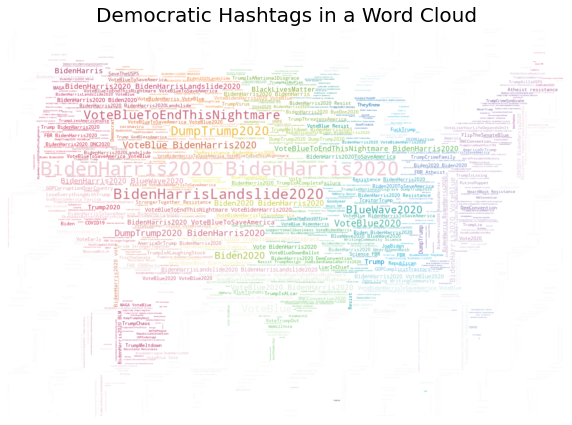

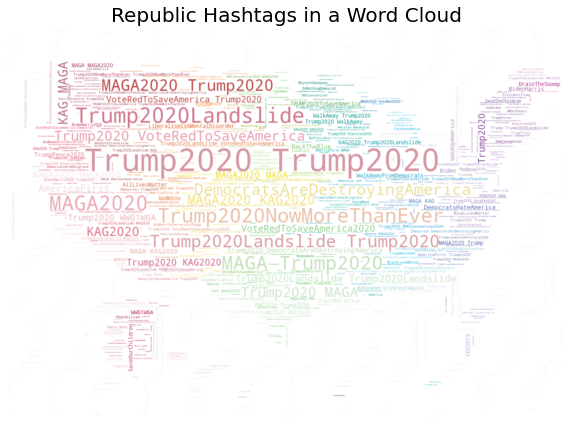

In [18]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Generate a word cloud image
UsaStr1 = ' '.join([str(elem) for elem in usa1]) 
mask = np.array(Image.open("img/usa.jpg"))
wordcloud_usa = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(UsaStr1)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Democratic Hashtags in a Word Cloud',fontsize=20)
# store to file
plt.savefig("Graphs/wordcloud_dem_hash.jpg", format="jpg")
plt.show()

# Generate a word cloud image
UsaStr2 = ' '.join([str(elem) for elem in usa2]) 
mask = np.array(Image.open("img/usa.jpg"))
wordcloud_usa = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(UsaStr2)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('Republic Hashtags in a Word Cloud',fontsize=20)
# store to file
plt.savefig("Graphs/wordcloud_rep_hash.jpg", format="jpg")
plt.show()

In [19]:
usa3 = []
usa4 = []
for i in range(1,6):
    data=pd.read_csv('democ'+str(i)+'.csv')
    dem_tweet=data.tweetText.tolist()
    for j in dem_tweet:
            tweets = j.split()
            for z in tweets:
                usa3.append(z)       
for i in range(1,6):
    data=pd.read_csv('repub'+str(i)+'.csv')
    rep_tweet=data.tweetText.tolist()
    for j in rep_tweet:
            tweets = j.split()
            for z in tweets:
                usa4.append(z)

Stopwords =["https","co","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

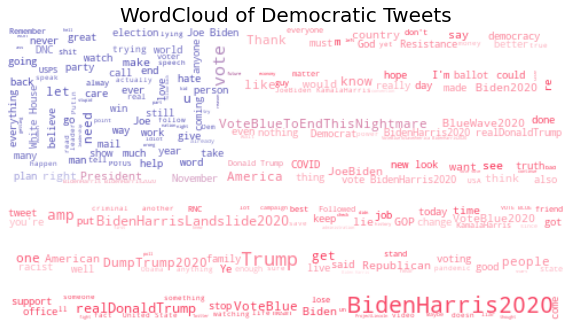

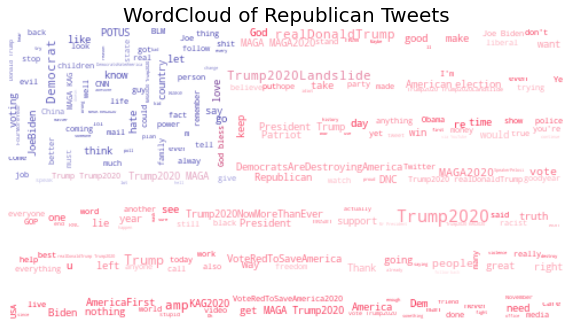

In [20]:
# Generate a word cloud image
UsaStr3 = ' '.join([str(elem) for elem in usa3]) 
mask = np.array(Image.open("img/us.png"))
wordcloud_usa = WordCloud(stopwords=Stopwords,background_color="white", mode="RGBA", max_words=500, mask=mask).generate(UsaStr3)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud of Democratic Tweets',fontsize=20)
# store to file
plt.savefig("Graphs/wordcloud_dem_tweet.jpg", format="jpg")
plt.show()

# Generate a word cloud image
UsaStr4 = ' '.join([str(elem) for elem in usa4]) 

mask = np.array(Image.open("img/us.png"))
wordcloud_usa = WordCloud(stopwords=Stopwords,background_color="white", mode="RGBA", max_words=500, mask=mask).generate(UsaStr4)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud of Republican Tweets',fontsize=20)
# store to file
plt.savefig("Graphs/wordcloud_rep_tweet.jpg", format="jpg")
plt.show()

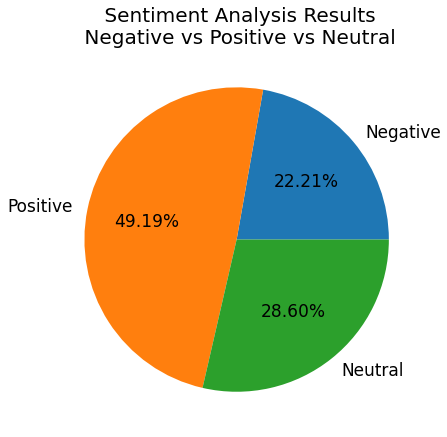

In [21]:
Negative = 0
Positive = 0
Neutral = 0
for i in range(1,5):
    S_Data =pd.read_csv('sentiday'+str(i)+'.csv')   
    sentiment_col=S_Data.sentiment.tolist()
    Negative+=sentiment_col.count('negative')
    Positive+=sentiment_col.count(' positive ')
    Neutral+=sentiment_col.count('neutral')

sentiment = ['Negative','Positive','Neutral']
sentiment_count=[Negative,Positive,Neutral]
fig5 = plt.figure(figsize =(10, 7)) 
plt.title(' Sentiment Analysis Results\n Negative vs Positive vs Neutral',fontsize=20)
plt.pie(sentiment_count, labels = sentiment, autopct='%1.2f%%',textprops={'fontsize': 17})  ###Plots Pie chart of verified vs non_verified vs Banned 
plt.savefig('Graphs/Pie_Sentiment.png',dpi=100, bbox_inches='tight')
plt.show()
